<a href="https://colab.research.google.com/github/ViniSimon/ViniSimon/blob/main/1%C2%BA_Projeto_Londres.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise dos Dados do Airbnb - *Londres*
Neste projeto, vamos analisar alguns dados que foram extraidos do site, inside AIRBNB, da cidade de londres, com objetivo de identificar erros, oportunidades e chegar alguma conclusão através dos dados. Me chamo Vinícius Englert, e vamos algumas lá.

**Linguagem e Bibliotecas**
- Neste projeto vamos utilizar Phyton e algumas bibliotecas; Pandas, Matplotlib e Seaborn.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**No código abaixo, baixamos a lista do AIRBNB e adicionamos em nosso notebook.**

In [21]:
df = pd.read_csv('listings.csv')

**Agora, vamos analisar como são os dados no qual vamos trabalhar.**

In [22]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,13913,Holiday London DB Room Let-on going,54730,Alina,NaN,Islington,51.56802,-0.11121,Private room,65,1,21,2011-09-13,0.17,2,359,0,NaN
1,15400,Bright Chelsea Apartment. Chelsea!,60302,Philippa,NaN,Kensington and Chelsea,51.48780,-0.16813,Entire home/apt,75,3,89,2019-08-10,0.80,1,153,0,NaN
2,17402,Superb 3-Bed/2 Bath & Wifi: Trendy W1,67564,Liz,NaN,Westminster,51.52195,-0.14094,Entire home/apt,307,4,43,2019-11-02,0.35,15,322,1,NaN
3,17506,Boutique Chelsea/Fulham Double bed 5-star ensuite,67915,Charlotte,NaN,Hammersmith and Fulham,51.47935,-0.19743,Private room,150,3,0,NaN,NaN,2,364,0,NaN
4,24328,"Battersea bedroom & studio, parking, shared ga...",41759,Joe,NaN,Wandsworth,51.47298,-0.16376,Entire home/apt,195,7,93,2015-10-24,0.77,1,248,0,NaN


**Definimos a nossa entrada ou seja quantidade de dados e suas váriaveis, que são representadas abaixo;**

In [23]:
print("Entradas:\t {}".format(df.shape[0]))
print("Variáveis:\t {}\n".format(df.shape[1]))

display(df.dtypes)

Entradas:	 70617
Variáveis:	 18



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                           float64
dtype: object

**Utuilizamos um código para verificar o percentual de números nulos/invalidos em ordem crescente.**

In [24]:
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False) *100

license                           100.000000
neighbourhood_group               100.000000
reviews_per_month                  29.861082
last_review                        29.861082
host_name                           0.955860
name                                0.033986
longitude                           0.000000
host_id                             0.000000
neighbourhood                       0.000000
latitude                            0.000000
room_type                           0.000000
number_of_reviews_ltm               0.000000
price                               0.000000
minimum_nights                      0.000000
number_of_reviews                   0.000000
calculated_host_listings_count      0.000000
availability_365                    0.000000
id                                  0.000000
dtype: float64

**Histograma para analisarmos os dados em gráfico e já percemos algumas distorções.**

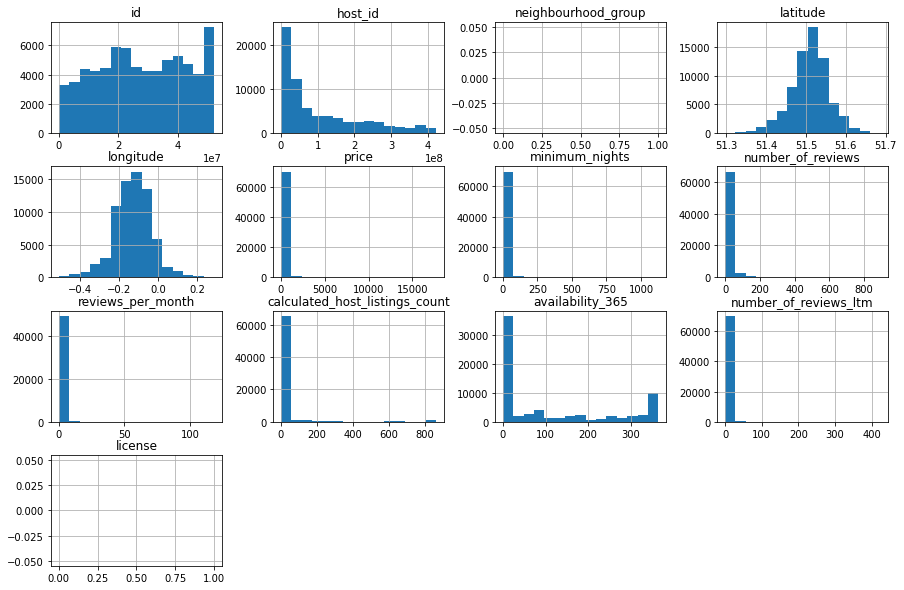

In [25]:
df.hist(bins=15, figsize=(15,10));

**Definimos algumas colunas que podem ter algumas alterações.**

In [26]:
df[['price', 'calculated_host_listings_count', 'minimum_nights', 'reviews_per_month', 'availability_365', 'number_of_reviews_ltm']].describe()

,price,calculated_host_listings_count,minimum_nights,reviews_per_month,availability_365,number_of_reviews_ltm
count,70617.000000,70617.000000,70617.000000,49530.000000,70617.000000,70617.000000
mean,137.489528,32.757141,6.717504,0.690920,108.375816,1.381197
std,302.702928,128.979783,31.589879,1.697638,138.376088,5.976998
min,0.000000,1.000000,1.000000,0.010000,0.000000,0.000000
25%,45.000000,1.000000,1.000000,0.090000,0.000000,0.000000
50%,80.000000,1.000000,2.000000,0.300000,10.000000,0.000000
75%,139.000000,4.000000,4.000000,0.840000,223.000000,1.000000
max,17709.000000,864.000000,1125.000000,118.290000,365.000000,424.000000


mininum_night: valores acima de 60:
1129 entradas
1.5988%


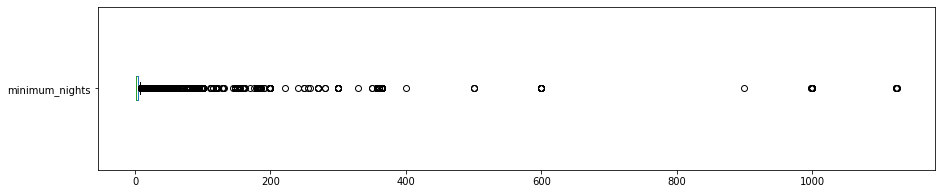

In [27]:
df.minimum_nights.plot(kind='box', vert=False, figsize= (15, 3))
plt.show

print('mininum_night: valores acima de 60:')
print('{} entradas'.format(len(df[df.minimum_nights > 60])))
print("{:.4f}%".format((len(df[df.minimum_nights > 60]) / df.shape[0])*100))

price: valores acima de 1000:
859 entradas
1.2164%


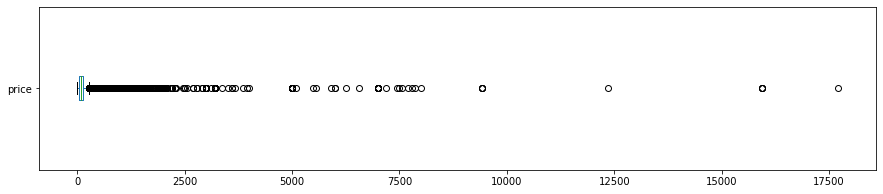

In [28]:
df.price.plot(kind='box', vert=False, figsize= (15,3))
print('price: valores acima de 1000:')
print('{} entradas'.format(len(df[df.price > 1000])))
print("{:.4f}%".format((len(df[df.price > 1000]) / df.shape[0])*100))

**Após tratar melhor o dados, conseguimos analisar algumas diferenças agora.**

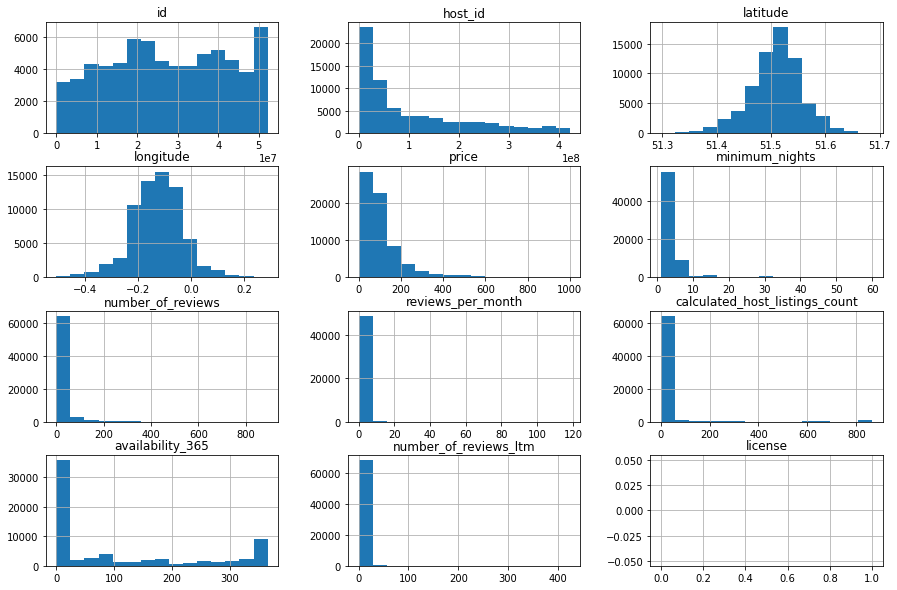

In [29]:
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 1000].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 60].index, axis=0, inplace=True)
df_clean.drop('neighbourhood_group', axis=1, inplace=True)
df_clean.hist(bins=15, figsize=(15,10));

**Preço média da diária em Londres, através do AIRBNB.**

In [30]:
df.price.mean()

137.48952801733293

In [31]:
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']].corr()
display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,0.008286,-0.069215,-0.013980,0.302649,0.117771
minimum_nights,0.008286,1.000000,-0.057405,-0.060866,-0.061540,0.016849
number_of_reviews,-0.069215,-0.057405,1.000000,0.403854,-0.077003,0.069935
reviews_per_month,-0.013980,-0.060866,0.403854,1.000000,-0.024285,0.120424
calculated_host_listings_count,0.302649,-0.061540,-0.077003,-0.024285,1.000000,0.087005
availability_365,0.117771,0.016849,0.069935,0.120424,0.087005,1.000000


**Correlações de variaveis**

Azul para pontos positivos.

Vermelho para pontos negativos.

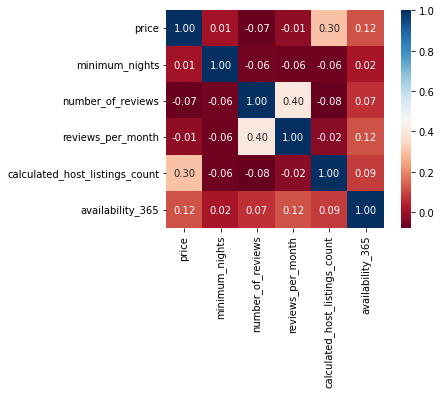

In [32]:
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='White', annot=True);

**Aqui conseguimos visualizar quais os tipos de moradias mais alugadas**

In [33]:
df_clean.room_type.value_counts()

Entire home/apt    37900
Private room       29768
Shared room          559
Hotel room           412
Name: room_type, dtype: int64

**Agora em percentual**

In [34]:
df_clean.room_type.value_counts() / df.shape[0]*100

Entire home/apt    53.669796
Private room       42.154156
Shared room         0.791594
Hotel room          0.583429
Name: room_type, dtype: float64

**Quais são os bairros mais buscados**

In [35]:
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
Kensington and Chelsea    181.453562
Westminster               181.367783
City of London            163.241176
Camden                    131.443340
Hammersmith and Fulham    131.158909
Richmond upon Thames      129.457962
Wandsworth                126.130922
Merton                    110.809695
Islington                 109.654550
Brent                     103.205438
Name: price, dtype: float64

**Agora podemos verificar em forma gráfica os valores da diária**

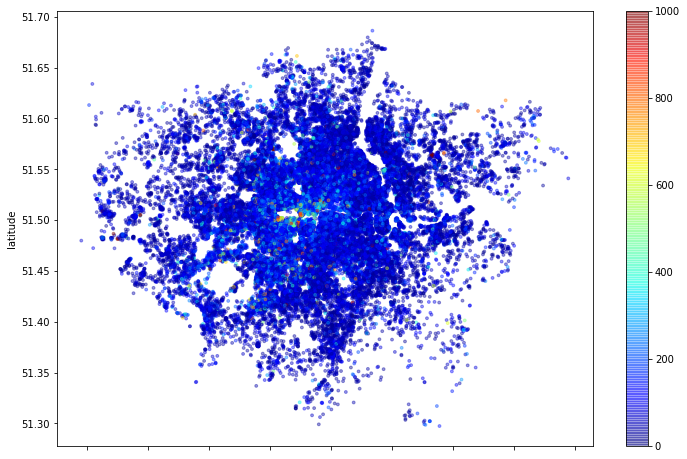

In [36]:
df_clean.plot(kind='scatter', x='longitude', y= 'latitude', alpha=0.4, c=df_clean['price'], s=8, cmap=plt.get_cmap('jet'), figsize= (12,8));

**Conclusão**
Após uma  analise com 70.000 entradas na cidade de Londres, podemos  concluir que sua grande concentração de alugueis são realizadas na  região central, com um valor médio de $137,00 mais de 95% preferem quartos e apartamentos privativos, com uma média de diária de 6 noites. 
Sendo assim gerando uma oportunidade para moradores locais, podemos passar algumas temporadas em lugares mais afastado por 45,00 e alugando o seu obtendo um lucro de 92,00 por diária. Essa oportunidade fica ainda melhor na sua alta temporada entre junho e agosto, época de verão bastante procurada por turístas.